In [1]:
# Bibliothèques de base
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import math
import time
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')


# Bibliothèques ML

import sklearn.svm as sksvm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




In [2]:
#Fichier .csv en entrée: Il s'agit du formulaire rempli par les patients que l'on
#exploitera par la suite

file='BaroProjet.csv'

#Voici la dataframe automatiquement fournie par le fichier précédent
#En pratique, on ne l'utilisera pas

df_0=pd.read_csv(file)

df_0

,user_uuid,container_type,container_uuid,container_title,creation_time,last_modification_time,activity_state,generator_uuid,generator_title,occurrence,...,answer_question_6,question_uuid_7,question_title_7,answer_question_7,question_uuid_8,question_title_8,answer_question_8,question_uuid_9,question_title_9,answer_question_9
0,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-04-15T00:00:42.007640+02:00,2019-04-16T18:42:29.842847+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,1,...,7.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,7.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,5.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,8.0
1,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-04-22T00:00:26.007438+02:00,2019-04-25T18:27:16.464706+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,2,...,5.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,9.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,7.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,9.0
2,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-04-29T00:00:31.679510+02:00,2019-04-29T17:40:30.604698+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,3,...,4.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,9.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,9.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,9.0
3,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-05-06T00:00:54.682867+02:00,2019-05-06T14:51:08.153542+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,4,...,3.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,8.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,8.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,8.0
4,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-05-13T00:00:53.672126+02:00,2019-05-13T18:03:13.658840+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,5,...,2.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,8.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,8.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,7b833db22e294d13b14e7b206f3f5614,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-09-30T00:00:25.256715+02:00,2019-09-30T23:40:20.889188+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,21,...,5.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,8.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,0.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,7.0
2233,7b833db22e294d13b14e7b206f3f5614,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-10-07T00:00:25.306022+02:00,2019-10-09T19:27:23.867067+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,22,...,4.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,3.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,2.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,9.0
2234,7b833db22e294d13b14e7b206f3f5614,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-10-14T00:00:06.263228+02:00,2019-10-14T00:00:06.263228+02:00,missed,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,23,...,NaN,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,NaN,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,NaN,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,NaN
2235,7b833db22e294d13b14e7b206f3f5614,form,e4ce9193707a46639

In [3]:
#Ces baromètres sont ceux qui nous intéressent dans notre étude

Dictionnaire_Barometres={
                         1:'Qualité du sommeil sur la semaine écoulée',
                         2:'Moral sur la semaine écoulée',
                         3:'Fatigue/Énergie sur la semaine écoulée',
                         4:'Sensation de confort corporel sur la semaine écoulée',
                         5:'Anxiété sur la semaine écoulée',
                         6:'Douleur moyenne sur la semaine écoulée'}


D=Dictionnaire_Barometres

In [4]:
#Code indiquant le nombre de patients de l'étude, on attribuera à ce nombre la variable N

N=len(df_0['user_uuid'].unique())

print('Le nombre de patients de cette étude est: ',N)

Le nombre de patients de cette étude est:  95


In [5]:
def NewDataFrame(OldDF):
    "Transforme la dataframe issue du questionnaire en une dataframe un peu plus exploitable"
    tmp=OldDF.reset_index()
    New=pd.DataFrame(tmp['user_uuid'])
    New['Date_Creation']=tmp['creation_time']
    for i in range(1,7):
        New[Dictionnaire_Barometres[i]]=tmp['answer_question_'+str(i+1)]

    New[D[5]]=10-New[D[5]] # Ajustement
    New[D[6]]=10-New[D[6]] # Ajustement
    return New

df=NewDataFrame(df_0)

In [6]:
df

,user_uuid,Date_Creation,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée
0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,3.0,6.0,3.0,3.0,3.0,3.0
1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,1.0,6.0,1.0,1.0,5.0,1.0
2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,1.0,6.0,2.0,2.0,6.0,1.0
3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,1.0,2.0,2.0,2.0,7.0,2.0
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.0,1.0,1.0,2.0,8.0,2.0
...,...,...,...,...,...,...,...,...
2232,7b833db22e294d13b14e7b206f3f5614,2019-09-30T00:00:25.256715+02:00,6.0,7.0,5.0,5.0,5.0,2.0
2233,7b833db22e294d13b14e7b206f3f5614,2019-10-07T00:00:25.306022+02:00,4.0,3.0,4.0,4.0,6.0,7.0
2234,7b833db22e294d13b14e7b206f3f5614,2019-10-14T00:00:06.263228+02:00,NaN,NaN,NaN,NaN,NaN,NaN
2235,7b833db22e294d13b14e7b206f3f5614,2019-10-21T00:00:06.302424+02:00,5.0,4.0,2.0,2.0,6.0,7.0


In [7]:
df.pivot_table(columns=['user_uuid'], aggfunc='size').value_counts()

27    34
26    16
25     8
24     8
23     5
22     5
21     3
20     2
3      2
18     2
15     2
5      2
7      1
36     1
9      1
13     1
34     1
2      1
dtype: int64

###  data analysis

In [8]:
df_missing = df[['user_uuid','Date_Creation','Qualité du sommeil sur la semaine écoulée','Moral sur la semaine écoulée','Fatigue/Énergie sur la semaine écoulée','Sensation de confort corporel sur la semaine écoulée','Anxiété sur la semaine écoulée','Douleur moyenne sur la semaine écoulée']]

In [9]:
df_missing.rename({'Qualité du sommeil sur la semaine écoulée': 'sleep', 'Moral sur la semaine écoulée': 'moral', 'Fatigue/Énergie sur la semaine écoulée': 'tiredness', 'Sensation de confort corporel sur la semaine écoulée': 'body comfort', 'Anxiété sur la semaine écoulée': 'stress', 'Douleur moyenne sur la semaine écoulée': 'pain'}, axis=1, inplace=True)

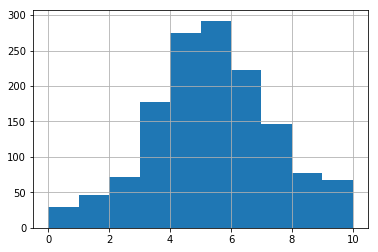

In [10]:
df_missing.sleep.hist()

In [11]:
list_identity = df.pivot_table(columns=['user_uuid']).columns

In [12]:
len(list_identity) 

90

In [13]:
frequence_identity = []
for i in range (0, len(list_identity)):
    frequence_identity.append(len(df[df['user_uuid'] == list_identity[i]])) 

In [14]:
len(frequence_identity)

90

In [15]:
import arrow

In [16]:
intervals_data = []
for i in range (0, len(list_identity)):
    for j in  df[df['user_uuid' ] == list_identity[i]]["Date_Creation"].index[:-1]:
        a = arrow.get(str(df[df['user_uuid'] == list_identity[i]]["Date_Creation"][j])[:10])
        b = arrow.get(str(df[df['user_uuid'] == list_identity[i]]["Date_Creation"][j+1])[:10])
        delta = (b-a)
        intervals_data.append(delta.days)   

In [17]:
len(intervals_data)

2033

In [18]:
frequences_and_intervals = []

In [19]:
for i in range(0,len(frequence_identity)):
    sum_frequences = 0
    for j in range(0,i):
        sum_frequences = sum_frequences + frequence_identity[j] - 1
    frequences_and_intervals.append([frequence_identity[i],intervals_data[sum_frequences:sum_frequences+frequence_identity[i]-1]])    

In [104]:
#len(frequences_and_intervals)

In [21]:
first_time_response = []
for j in range(0, len(frequences_and_intervals)):
    first_time_response.append(frequences_and_intervals[j][1][0])

In [22]:
import collections

In [23]:
elements_count = collections.Counter(first_time_response)
elements_count.items()

dict_items([(6, 18), (2, 12), (5, 21), (3, 9), (1, 8), (4, 20), (7, 2)])

In [24]:
for value in elements_count.items():
    print(value)

(6, 18)
(2, 12)
(5, 21)
(3, 9)
(1, 8)
(4, 20)
(7, 2)


checking lengths and frequences of time series

In [25]:
len_and_frequence = df.pivot_table(columns=['user_uuid'], aggfunc='size').value_counts()

In [26]:
len_and_frequence.values

array([34, 16,  8,  8,  5,  5,  3,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,
        1], dtype=int64)

In [27]:
len_and_frequence.index

Int64Index([27, 26, 25, 24, 23, 22, 21, 20, 3, 18, 15, 5, 7, 36, 9, 13, 34, 2], dtype='int64')

### imputation methods

In [28]:
percentage_non_missing = []
number_missing_vs_full = []
number_missing_vs_full_vs_percentage = []
number_missing_vs_full_vs_percentage_vs_user = []
for timeseries_user in list_identity:
    df_timeseries_missing=df_missing[df_missing['user_uuid']==timeseries_user]
    number_missing_vs_full.append([df_timeseries_missing['sleep'].isnull().sum(),len(df_timeseries_missing['sleep'])])
    percentage_non_missing.append(round(100-df_timeseries_missing['sleep'].isnull().sum()/len(df_timeseries_missing['sleep'])*100,2))
    number_missing_vs_full_vs_percentage.append([df_timeseries_missing['sleep'].isnull().sum(),len(df_timeseries_missing['sleep']),round(100-df_timeseries_missing['sleep'].isnull().sum()/len(df_timeseries_missing['sleep'])*100,2)])
    number_missing_vs_full_vs_percentage_vs_user.append([df_timeseries_missing['sleep'].isnull().sum(),len(df_timeseries_missing['sleep']),round(100-df_timeseries_missing['sleep'].isnull().sum()/len(df_timeseries_missing['sleep'])*100,2),timeseries_user])

In [29]:
number_missing_vs_full_sorted = sorted(number_missing_vs_full_vs_percentage_vs_user, key=lambda x: x[1])

In [30]:
data_consider_for_imputation = []
percentage_non_missing = []
list_identity_imputation_consider = []
for i in range (0,len(number_missing_vs_full_sorted)):
    if number_missing_vs_full_sorted[i][1] == 27:
        data_consider_for_imputation. append(number_missing_vs_full_sorted[i])
        percentage_non_missing.append(number_missing_vs_full_sorted[i][2])
        list_identity_imputation_consider.append(number_missing_vs_full_sorted[i][3])

In [31]:
np.mean(percentage_non_missing)

63.63636363636363

In [32]:
len(list_identity_imputation_consider) 

33

In [33]:
df_missing_consider_imputation = pd.DataFrame()
for timeseries_user in list_identity_imputation_consider:    
    df_missing_consider_imputation = pd.concat([df_missing[df_missing['user_uuid']==timeseries_user],df_missing_consider_imputation], ignore_index=True, sort=False)

In [34]:
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [35]:
impute_data_consider = IterativeImputer(max_iter=10, random_state=0)

In [36]:
df_missing_consider_imputation[['sleep','moral','tiredness','body comfort','stress','pain']]

,sleep,moral,tiredness,body comfort,stress,pain
0,6.0,5.0,9.0,5.0,8.0,5.0
1,5.0,3.0,3.0,2.0,6.0,5.0
2,7.0,5.0,4.0,4.0,6.0,4.0
3,7.0,5.0,3.0,2.0,5.0,3.0
4,4.0,3.0,3.0,2.0,4.0,4.0
...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
impute_data_consider.fit(df_missing_consider_imputation[['sleep','moral','tiredness','body comfort','stress','pain']])

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [38]:
impute_data_consider

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [39]:
data_consider_imputed = round(pd.DataFrame(impute_data_consider.transform(df_missing_consider_imputation[['sleep','moral','tiredness','body comfort','stress','pain']])))

In [40]:
data_consider_imputed.columns =['sleep_imputed','moral_imputed','tiredness_imputed','body comfort_imputed','stress_imputed','pain_imputed']

In [41]:
data_consider_imputed_full = df_missing_consider_imputation.join(data_consider_imputed, how='outer')

In [42]:
data_consider_imputed_full

,user_uuid,Date_Creation,sleep,moral,tiredness,body comfort,stress,pain,sleep_imputed,moral_imputed,tiredness_imputed,body comfort_imputed,stress_imputed,pain_imputed
0,fd2366757ce14d4087cbbf8e12a8626e,2019-04-09T00:00:34.009039+02:00,6.0,5.0,9.0,5.0,8.0,5.0,6.0,5.0,9.0,5.0,8.0,5.0
1,fd2366757ce14d4087cbbf8e12a8626e,2019-04-15T00:00:42.007640+02:00,5.0,3.0,3.0,2.0,6.0,5.0,5.0,3.0,3.0,2.0,6.0,5.0
2,fd2366757ce14d4087cbbf8e12a8626e,2019-04-22T00:00:26.007438+02:00,7.0,5.0,4.0,4.0,6.0,4.0,7.0,5.0,4.0,4.0,6.0,4.0
3,fd2366757ce14d4087cbbf8e12a8626e,2019-04-29T00:00:31.679510+02:00,7.0,5.0,3.0,2.0,5.0,3.0,7.0,5.0,3.0,2.0,5.0,3.0
4,fd2366757ce14d4087cbbf8e12a8626e,2019-05-06T00:00:54.682867+02:00,4.0,3.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,00938cdd37a14235bc5c47a0229fa136,2019-07-29T00:00:46.768377+02:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,5.0,4.0,6.0,4.0
887,00938cdd37a14235bc5c47a0229fa136,2019-08-05T00:00:51.804039+02:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,5.0,4.0,6.0,4.0
888,00938cdd37a14235bc5c47a0229fa136,2019-08-12T00:00:05.414112+02:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,5.0,4.0,6.0,4.0
889,00938cdd37a14235bc5c47a0229fa136,2019-08-19T00:00:11.413999+02:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,5.0,4.0,6.0,4.0


In [44]:
list_identity_consider = []
for timeseries_user in list_identity:
    df_timeseries_missing=df_missing[df_missing['user_uuid']==timeseries_user]
    #if len(df_timeseries_missing) >= 13 and int(100-df_timeseries_missing['sleep'].isnull().sum()/len(df_timeseries_missing['sleep'])*100) >= 50:
    if len(df_timeseries_missing) in range(22,28) and int(100-df_timeseries_missing['sleep'].isnull().sum()/len(df_timeseries_missing['sleep'])*100) >= 60:
    #if len(df_timeseries_missing) == 27 and int(100-df_timeseries_missing['sleep'].isnull().sum()/len(df_timeseries_missing['sleep'])*100) >= 100:
        list_identity_consider.append(timeseries_user)   

In [45]:
len(list_identity_consider)

44

In [46]:
import sklearn 

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [48]:
from sklearn.cluster import KMeans

In [103]:
#from yellowbrick.cluster import KElbowVisualizer

In [50]:
#Qualité du sommeil sur la semaine écoulée
df_timeseries_0 = pd.DataFrame()
for timeseries_user_all in list_identity_consider:
    df_timeseries_0 = pd.concat([df_timeseries_0,pd.DataFrame({timeseries_user_all : df_missing[df_missing['user_uuid']==timeseries_user_all]['sleep'].tolist()})],axis=1)
    
df_timeseries_1 = pd.DataFrame()
for timeseries_user_all in list_identity_consider:
    df_timeseries_1 = pd.concat([df_timeseries_1,pd.DataFrame({timeseries_user_all : df_missing[df_missing['user_uuid']==timeseries_user_all]['moral'].tolist()})],axis=1)
    
df_timeseries_2 = pd.DataFrame()
for timeseries_user_all in list_identity_consider:
    df_timeseries_2 = pd.concat([df_timeseries_2,pd.DataFrame({timeseries_user_all : df_missing[df_missing['user_uuid']==timeseries_user_all]['tiredness'].tolist()})],axis=1)
    
df_timeseries_3 = pd.DataFrame()
for timeseries_user_all in list_identity_consider:
    df_timeseries_3 = pd.concat([df_timeseries_3,pd.DataFrame({timeseries_user_all : df_missing[df_missing['user_uuid']==timeseries_user_all]['body comfort'].tolist()})],axis=1)
    
df_timeseries_4 = pd.DataFrame()
for timeseries_user_all in list_identity_consider:
    df_timeseries_4 = pd.concat([df_timeseries_4,pd.DataFrame({timeseries_user_all : df_missing[df_missing['user_uuid']==timeseries_user_all]['stress'].tolist()})],axis=1)
    
df_timeseries_5 = pd.DataFrame()
for timeseries_user_all in list_identity_consider:
    df_timeseries_5 = pd.concat([df_timeseries_5,pd.DataFrame({timeseries_user_all : df_missing[df_missing['user_uuid']==timeseries_user_all]['pain'].tolist()})],axis=1)
    

In [51]:
df_timeseries_all_missing = [df_timeseries_0,df_timeseries_1,df_timeseries_2,df_timeseries_3,df_timeseries_4,df_timeseries_5]

In [52]:
df_timeseries_consider_missing_score = []

for j in range(0,len(df_timeseries_all_missing)):    
    df_timeseries_consider_missing = df_timeseries_all_missing[j]
    
    new_column_names = []

    for i in range(0,len(df_timeseries_consider_missing.columns)):
        new_column_names.append(i)

    #new column names = []
    new_col_list = new_column_names

    #get the old columns names
    old_columns = list(df_timeseries_consider_missing)

    # rename the columns inplate
    df_timeseries_consider_missing.rename(columns={old_columns[idx]: name for  (idx, name) in enumerate(new_col_list)}, inplace=True)
    
    df_timeseries_consider_missing_score.append(df_timeseries_consider_missing)

In [53]:
impute_time_series = IterativeImputer(max_iter=10, random_state=0)

In [54]:
df_timeseries_consider_imputed_score = []
for j in range(0,len(df_timeseries_consider_missing_score)):
    impute_time_series.fit(df_timeseries_consider_missing_score[j])
    df_timeseries_consider_imputed = round(pd.DataFrame(impute_time_series.transform(df_timeseries_consider_missing_score[j])))
    df_timeseries_consider_imputed_score.append(df_timeseries_consider_imputed)

In [55]:
len(df_timeseries_consider_imputed_score)

6

In [56]:
data_cluster_transform_imputed = np.empty(shape=(len(df_timeseries_consider_imputed_score[0].columns), len(df_timeseries_consider_imputed_score[0]), len(df_timeseries_consider_imputed_score)))
#data_cluster_transform_imputed = []
for i in range(0,len(df_timeseries_consider_imputed_score[0].columns)):
    for j in range(0,len(df_timeseries_consider_imputed_score[0])):
        for h in range(0,len(df_timeseries_consider_imputed_score)):
            data_cluster_transform_imputed[i][j][h] = df_timeseries_consider_imputed_score[h][j:j+1][i].values

In [57]:
km_imputed = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=5,
                   random_state=0)
km_imputed.fit(data_cluster_transform_imputed)
som_y = math.ceil(math.sqrt(math.sqrt(len(data_cluster_transform_imputed[0]))))
labels = km_imputed.fit_predict(data_cluster_transform_imputed)

### Clustering each points from data

In [98]:
#data_cluster_transform_imputed[43][26]

In [99]:
#len(data_cluster_transform_imputed)

In [100]:
#len(df_timeseries_consider_imputed_score[0])

In [101]:
#len(data_cluster_transform_imputed[0][0])

In [62]:
df_timeseries_consider_clustering_new= np.empty(shape=(len(df_timeseries_consider_imputed_score[0]),len(data_cluster_transform_imputed),len(data_cluster_transform_imputed[0][0])))

In [63]:
for i in range(0,len(df_timeseries_consider_imputed_score[0])):
    for j in range(0,len(data_cluster_transform_imputed)):
        for h in range(0,len(data_cluster_transform_imputed[0][0])):
            df_timeseries_consider_clustering_new[i][j][h] =  data_cluster_transform_imputed[j][i][h]

In [102]:
#len(df_timeseries_consider_clustering_new[0])

In [65]:
y_k_means =  np.empty(shape = (len(df_timeseries_consider_imputed_score[0]),len(data_cluster_transform_imputed)))

In [66]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [67]:
for i in range(0, len(df_timeseries_consider_imputed_score[0])):
    y_predict = kmeans.fit_predict(df_timeseries_consider_clustering_new[i])
    for j in range(0,len(data_cluster_transform_imputed)):
        y_k_means[i][j] = y_predict[j]
    

In [68]:
y_k_means[26]

array([0., 2., 2., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 2., 1., 2., 1.,
       2., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 2., 1., 0., 1., 1., 2.,
       2., 0., 1., 2., 1., 0., 1., 2., 0., 0.])

In [69]:
len(y_k_means)

27

In [70]:
len(df_timeseries_consider_imputed_score[0])

27

create adjacency matrix

In [71]:
adjacency_matrix_new = np.zeros(shape=(len(df_timeseries_consider_imputed_score[0]),len(df_timeseries_consider_clustering_new[0]),len(df_timeseries_consider_clustering_new[0])))

In [72]:
#len(df_timeseries_consider_imputed_score[0])

In [73]:
for h in range(0,len(y_k_means)):
    for i in range(0,len(df_timeseries_consider_clustering_new[0])):
        for j in range(0,len(df_timeseries_consider_clustering_new[0])):
            if y_k_means[h][i] == y_k_means[h][j]:
                if i !=j :
                    adjacency_matrix_new[h][i][j] = adjacency_matrix_new[h][j][i] = 1
                else:
                    adjacency_matrix_new[h][i][j] = adjacency_matrix_new[h][j][i] = 0
            else:
                adjacency_matrix_new[h][i][j] = adjacency_matrix_new[h][j][i] = 0

In [74]:
adjacency_matrix_new[26][29]

array([0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])

In [75]:
means_matrix = np.mean(adjacency_matrix_new, axis = 0)

In [76]:
means_matrix[40]

array([0.66666667, 0.62962963, 0.22222222, 0.44444444, 0.59259259,
       0.18518519, 0.22222222, 0.48148148, 0.74074074, 0.44444444,
       0.22222222, 0.62962963, 0.14814815, 0.33333333, 0.74074074,
       0.07407407, 0.77777778, 0.33333333, 0.48148148, 0.40740741,
       0.18518519, 0.59259259, 0.2962963 , 0.7037037 , 0.7037037 ,
       0.66666667, 0.66666667, 0.44444444, 0.25925926, 0.55555556,
       0.25925926, 0.55555556, 0.37037037, 0.55555556, 0.40740741,
       0.07407407, 0.37037037, 0.2962963 , 0.62962963, 0.14814815,
       0.        , 0.2962963 , 0.07407407, 0.22222222])

In [80]:
from networkx.algorithms import community

### louvain method


In [87]:
#import python-louvain

In [88]:
import community

In [89]:
import community.community_louvain as community_louvain

In [90]:
means_matrix_3 = (adjacency_matrix_new[1]+adjacency_matrix_new[6]+adjacency_matrix_new[11]+adjacency_matrix_new[16]+adjacency_matrix_new[21]+adjacency_matrix_new[26])/6

In [91]:
G = nx.from_numpy_matrix(np.matrix(means_matrix_3))

In [92]:
partition = community_louvain.best_partition(G)

In [93]:
G

In [94]:
partition

{0: 0,
 1: 0,
 2: 1,
 3: 0,
 4: 0,
 5: 1,
 6: 1,
 7: 2,
 8: 0,
 9: 2,
 10: 1,
 11: 0,
 12: 1,
 13: 0,
 14: 0,
 15: 1,
 16: 0,
 17: 0,
 18: 0,
 19: 1,
 20: 1,
 21: 0,
 22: 1,
 23: 0,
 24: 2,
 25: 2,
 26: 0,
 27: 2,
 28: 0,
 29: 0,
 30: 2,
 31: 0,
 32: 2,
 33: 0,
 34: 0,
 35: 1,
 36: 0,
 37: 0,
 38: 2,
 39: 1,
 40: 2,
 41: 2,
 42: 1,
 43: 1}

In [95]:
pos = nx.spring_layout(G)

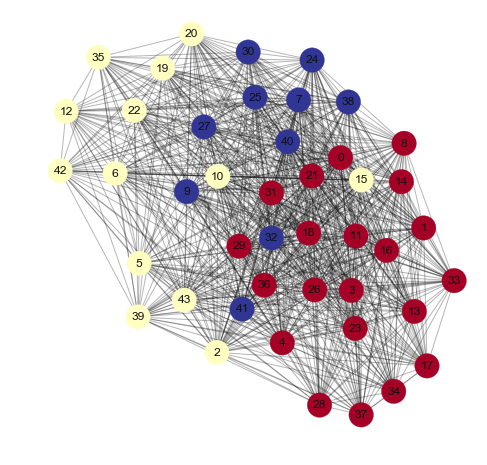

In [96]:
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
#nx.draw(G, node_color=color_map,with_labels=True)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G,pos)
plt.show(G)

In [97]:
import numpy as np
import seaborn as sns
import pandas as pd

min_val, max_val = 0,5
#intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
cm = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(np.round(means_matrix_3,2))
x=x.style.background_gradient(cmap=cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.000000,0.330000,0.330000,0.500000,0.670000,0.170000,0.170000,0.170000,0.670000,0.170000,0.000000,0.670000,0.170000,0.170000,0.670000,0.000000,0.830000,0.500000,0.500000,0.330000,0.330000,0.500000,0.170000,0.670000,0.170000,0.330000,0.330000,0.330000,0.330000,0.500000,0.500000,0.670000,0.500000,0.330000,0.500000,0.170000,0.500000,0.500000,0.500000,0.500000,0.500000,0.330000,0.170000,0.330000
1,0.330000,0.000000,0.330000,0.670000,0.170000,0.330000,0.170000,0.500000,0.500000,0.000000,0.330000,0.500000,0.000000,0.830000,0.500000,0.500000,0.330000,0.500000,0.500000,0.170000,0.170000,0.500000,0.170000,0.500000,0.170000,0.330000,0.830000,0.170000,0.670000,0.170000,0.330000,0.330000,0.330000,0.670000,0.500000,0.000000,0.500000,0.500000,0.500000,0.000000,0.500000,0.670000,0.000000,0.330000
2,0.330000,0.330000,0.000000,0.330000,0.500000,0.330000,0.170000,0.170000,0.170000,0.330000,0.330000,0.500000,0.170000,0.330000,0.170000,0.330000,0.330000,0.330000,0.170000,0.000000,0.170000,0.330000,0.330000,0.170000,0.330000,0.330000,0.170000,0.330000,0.500000,0.330000,0.330000,0.330000,0.670000,0.170000,0.330000,0.330000,0.330000,0.330000,0.170000,0.330000,0.170000,0.500000,0.170000,0.670000
3,0.500000,0.670000,0.330000,0.000000,0.500000,0.330000,0.000000,0.500000,0.500000,0.170000,0.500000,0.830000,0.000000,0.500000,0.500000,0.330000,0.670000,0.500000,0.830000,0.170000,0.170000,0.670000,0.000000,0.830000,0.170000,0.330000,0.830000,0.330000,0.670000,0.500000,0.170000,0.670000,0.670000,0.330000,0.500000,0.000000,0.830000,0.500000,0.500000,0.170000,0.500000,0.330000,0.000000,0.500000
4,0.670000,0.170000,0.500000,0.500000,0.000000,0.170000,0.170000,0.170000,0.670000,0.330000,0.330000,0.670000,0.170000,0.170000,0.670000,0.000000,0.830000,0.500000,0.500000,0.000000,0.000000,0.500000,0.170000,0.670000,0.330000,0.330000,0.330000,0.330000,0.330000,0.670000,0.170000,0.670000,0.500000,0.330000,0.500000,0.170000,0.500000,0.500000,0.500000,0.500000,0.500000,0.170000,0.170000,0.330000
5,0.170000,0.330000,0.330000,0.330000,0.170000,0.000000,0.500000,0.170000,0.000000,0.170000,0.830000,0.170000,0.670000,0.330000,0.000000,0.670000,0.000000,0.170000,0.170000,0.500000,0.330000,0.330000,0.330000,0.170000,0.000000,0.000000,0.330000,0.170000,0.330000,0.000000,0.170000,0.000000,0.170000,0.170000,0.170000,0.500000,0.170000,0.170000,0.000000,0.500000,0.000000,0.330000,0.670000,0.670000
6,0.170000,0.170000,0.170000,0.000000,0.170000,0.500000,0.000000,0.330000,0.170000,0.170000,0.330000,0.000000,0.830000,0.170000,0.170000,0.170000,0.000000,0.000000,0.170000,0.670000,0.500000,0.000000,0.830000,0.000000,0.330000,0.330000,0.170000,0.170000,0.000000,0.170000,0.500000,0.170000,0.000000,0.170000,0.000000,0.670000,0.170000,0.000000,0.330000,0.670000,0.330000,0.330000,0.830000,0.330000
7,0.170000,0.500000,0.170000,0.500000,0.170000,0.170000,0.330000,0.000000,0.500000,0.500000,0.330000,0.330000,0.170000,0.330000,0.500000,0.170000,0.330000,0.170000,0.670000,0.330000,0.500000,0.330000,0.500000,0.500000,0.670000,0.830000,0.670000,0.670000,0.170000,0.330000,0.670000,0.500000,0.500000,0.330000,0.170000,0.330000,0.330000,0.170000,0.670000,0.000000,0.670000,0.330000,0.170000,0.330000
8,0.670000,0.500000,0.170000,0.500000,0.670000,0.000000,0.170000,0.500000,0.000000,0.330000,0.170000,0.670000,0.000000,0.330000,1.000000,0.000000,0.830000,0.330000,0.500000,0.170000,0.170000,0.670000,0.170000,0.670000,0.500000,0.670000,0.670000,0.500000,0.170000,0.500000,0.500000,0.670000,0.500000,0.500000,0.330000,0.000000,0.500000,0.330000,0.830000,0.170000,0.830000,0.500000,0.000000,0.000000
9,0.170000,0.000000,0.330000,0.170000,0.330000,0.170000,0.170000,0.500000,0.330000,0.000000,0.330000,0.330000,0.330000,0.170000,0.330000,0.330000,0.330000,0.170000,0.330000,0.330000,0.500000,0.500000,0.330000,0.170000,0.830000,0.670000,0.170000,0.830000,0.170000,0.670000,0.500000,0.500000,0.500

### girvan_newman method

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], [20]]


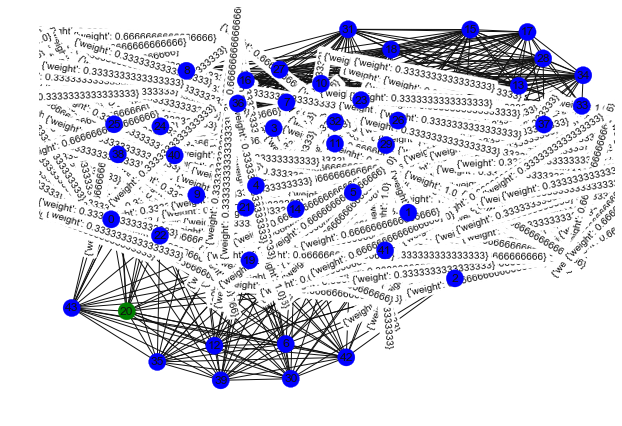

In [105]:
means_matrix_2 = (adjacency_matrix_new[0]+adjacency_matrix_new[13]+adjacency_matrix_new[26])/3

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

#G = nx.from_numpy_matrix(np.matrix(means_matrix))

G = nx.from_numpy_matrix(np.matrix(means_matrix_2))

communities = girvan_newman(G)
 
node_groups = []

for com in next(communities):   
    node_groups.append(list(com))
    
print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
        
layout = nx.spring_layout(G)
nx.draw(G, node_color=color_map,with_labels=True)
#labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()